## Parameters 

In [1]:
BASE_DIR = '/Descargas/datathon'
ZIP_NAME = 'smart_destinations_v2.zip'

## Unzip

In [2]:
import zipfile
from pathlib import Path

BASE_DIR = Path(BASE_DIR)

with zipfile.ZipFile(BASE_DIR.joinpath(ZIP_NAME), 'r') as zip_ref:
    zip_ref.extractall(BASE_DIR)

In [3]:
import os
import pandas as pd
import datetime as dt

## Append all files

In [4]:
csv_folder = '/Descargas/datathon/datos/CM04'
files = os.listdir(csv_folder)
df = []
for f in files:
   if f == "directorio_aeropuertos.csv":
      continue
   print(f)
   csv_file = csv_folder + "/" + f
   df.append(pd.read_csv(csv_file))
df_full = pd.concat(df, ignore_index = True)

maestro_cm04_2004.csv
maestro_cm04_2005.csv
maestro_cm04_2006.csv
maestro_cm04_2007.csv
maestro_cm04_2008.csv
maestro_cm04_2009.csv
maestro_cm04_2010.csv
maestro_cm04_2011.csv
maestro_cm04_2012.csv
maestro_cm04_2013.csv
maestro_cm04_2014.csv
maestro_cm04_2015.csv
maestro_cm04_2016.csv
maestro_cm04_2017.csv
maestro_cm04_2018.csv
maestro_cm04_2019.csv
maestro_cm04_202010.csv
maestro_cm04_202011_202102.csv
maestro_cm04_202104.csv
maestro_cm04_202105.csv
maestro_cm04_202106.csv
maestro_cm04_202107.csv


In [5]:
df_full

,indicador,servicio,movimiento,cod_origen,origen,pais_origen,lat_origen,lon_origen,cod_destino,pais_destino,destino,valor,fecha
0,Pasajeros,Comercial,Llegada,ES,España,España,NaN,NaN,ES70,España,Canarias,522145.0,20041231
1,Pasajeros,Comercial,Llegada,ES,España,España,NaN,NaN,ES70,España,Canarias,452701.0,20041130
2,Pasajeros,Comercial,Llegada,ES,España,España,NaN,NaN,ES70,España,Canarias,527565.0,20041031
3,Pasajeros,Comercial,Llegada,ES,España,España,NaN,NaN,ES70,España,Canarias,568136.0,20040930
4,Pasajeros,Comercial,Llegada,ES,España,España,NaN,NaN,ES70,España,Canarias,740922.0,20040831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028627,Operaciones,Otros servicios comerciales,Llegada,ES21,País Vasco,España,NaN,NaN,ES_GCXO,España,Aeropuerto de Tenerife Norte,NaN,20210731
6028628,Operaciones,Otros servicios comerciales,Llegada,ES21,País Vasco,España,NaN,NaN,ES_GCGM,España,Aeropuerto de La Gomera,NaN,20210731
6028629,Operaciones,Otros servicios comerciales,Llegada,ES21,País Vasco,España,NaN,NaN,ES_GCLA,España,Aeropuerto de La Palma,NaN,20210731
6028630,Operaciones,Otros servicios comerciales,Llegada,ES21,País Vasco,España,NaN,NaN,ES_GCLP,España,Aeropuerto de Gran Canaria,NaN,20210731


In [6]:
#Municipios incluidos
df_full["cod_destino"].unique()

array(['ES70', 'ES_GCFV', 'ES_GCLP', 'ES_GCRR', 'ES_GCHI', 'ES_GCGM',
       'ES_GCLA', 'ES_GCTS', 'ES_GCXO'], dtype=object)

In [7]:
#Eliminamos NA 
df2 = df_full[df_full['valor'].notna()]

In [8]:
#Formato de fecha
df3 = df2[['fecha']].copy(deep=True)
df3['fecha'] = pd.to_datetime(df3['fecha'], format='%Y%m%d')

In [9]:
df3

,fecha
0,2004-12-31
1,2004-11-30
2,2004-10-31
3,2004-09-30
4,2004-08-31
...,...
5913513,2021-01-31
5913515,2020-11-30
5913524,2021-02-28
5913532,2021-02-28


In [10]:
#reemplazamos columna de fecha
df2 = df2.assign(fecha=df3['fecha'])

In [11]:
#creamos columna de año mes
df2['Year'] = [x.strftime('%Y') for x in df2['fecha'].tolist()]
df2['Month'] = [x.strftime('%m') for x in df2['fecha'].tolist()]

<AxesSubplot:xlabel='Month'>

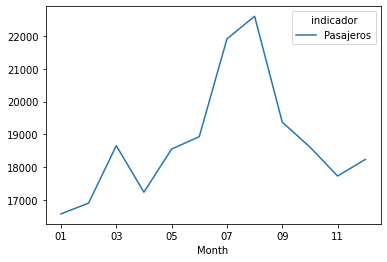

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

df2 = df2.loc[(df2['destino'] == "Canarias")]
df2 = df2.loc[(df2['Year'] != '2020')]

pd.pivot_table(df2[df2.indicador == 'Pasajeros'], values = "valor", index = ('Month'), columns = 'indicador', aggfunc = 'mean').plot()